In [2]:
# set working directory to same place ass app.py to import programs the same way as the app
import os
current_directory = os.getcwd()
if 'notebooks' in current_directory:
    parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
    os.chdir(parent_directory)
os.getcwd()

'/Users/elisealstad/code/dataengineer-job-dash'

In [39]:
import pandas as pd
import gcsfs
import os



# Define the path to your GCS bucket and file
file_path_gcp = "gs://oslo-linkedin-dataengineer-jobs/transformed/jobs_08082024.parquet"

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../service-account-details.json" 

df = pd.read_parquet(file_path_gcp)
df = df.replace({'seniority':{None:'Mid / not specified'}})

df



,jobid,job_type,pay,skills,seniority,date
0,3888819941,Data Scientist,NaN,"[machine learning, data science, nlp, business]",Mid / not specified,2024-08-08 13:39:46.904090
1,3995395648,Data Scientist,80.0,"[design, keras, business, tensorflow, sql, pan...",Senior,2024-08-08 13:39:46.904090
2,3995395483,Data Scientist,115.0,"[design, keras, business, tensorflow, sql, pan...",Lead,2024-08-08 13:39:46.904090
3,3995009647,Data Scientist,NaN,"[security, business, payments, dashboards, sql...",Mid / not specified,2024-08-08 13:39:46.904090
4,3934941573,Data Scientist,NaN,"[languages, machine learning, communications, ...",Mid / not specified,2024-08-08 13:39:46.904090
5,3994266329,Data Scientist,600.0,"[design, r, deep learning, reinforcement learn...",Mid / not specified,2024-08-08 13:39:46.904090
6,3993669015,Data Scientist,650.0,"[design, business, data science, collaboration...",Mid / not specified,2024-08-08 13:39:46.904090
7,3993608897,Data Scientist,NaN,"[design, business, dashboards, data science, d...",Senior,2024-08-08 13:39:46.904090
8,3996253255,Data Scientist,130000.0,"[business, sql, data science, python, time ser...",Mid / not specified,2024-08-08 13:39:46.904090
9,3994290264,Data Scientist,NaN,"[design, r, data science, ai, algorithms, lang...",Senior,2024-08-08 13:39:46.904090


In [80]:
filtered_df = df.query('job_type == @df.job_type.unique().tolist()[0]')
filtered_df = filtered_df.query('seniority == @df.seniority.unique().tolist()[0]')

start_date = "2023-02-01"
end_date = "2024-12-01"

# Filter the DataFrame
filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

ls_skills = df.explode('skills')['skills'].tolist()
filtered_df = filtered_df[filtered_df['skills'].map(lambda x: ls_skills[0] in x)]
filtered_df

,jobid,job_type,pay,skills,seniority,date
0,3888819941,Data Scientist,NaN,"[machine learning, data science, nlp, business]",Mid / not specified,2024-08-08 13:39:46.904090
4,3934941573,Data Scientist,NaN,"[languages, machine learning, communications, ...",Mid / not specified,2024-08-08 13:39:46.904090
6,3993669015,Data Scientist,650.0,"[design, business, data science, collaboration...",Mid / not specified,2024-08-08 13:39:46.904090
12,3994629444,Data Scientist,NaN,"[business, snowflake, query languages, tableau...",Mid / not specified,2024-08-08 13:39:46.904090
19,3993667742,Data Scientist,NaN,"[design, business, sql, data science, excel, a...",Mid / not specified,2024-08-08 13:39:46.904090


In [69]:
# import polars as pl

coding_languages = [
    'python', 'javascript', 'java', 'c++', 'c#', 'php', 'ruby', 'swift', 'kotlin', 'typescript',
    'go', 'rust', 'sql', 'r', 'html', 'css', 'bash', 'perl', 'objective-c', 'scala',
    'lua', 'haskell', 'matlab', 'dart', 'visual basic .net', 'assembly language', 'f#', 'groovy', 'elixir', 'clojure',
    'erlang', 'julia', 'vbscript', 'lisp', 'prolog', 'scheme', 'ada', 'fortran', 'cobol', 'pascal',
    'racket', 'scratch', 'tcl', 'smalltalk', 'actionscript', 'awk', 'ocaml', 'pl/sql', 'sas', 'logo'
]

# Dictionary for replacements
cloud_skills = {
    'aws': 'amazon web services',
    'gcp': 'google cloud platform',
    'azure': 'microsoft azure',
    'ibm': 'ibm cloud',
    'oci': 'oracle cloud',
    'sf': 'salesforce',
    'sap': 'sap cloud',
    'do': 'digitalocean'
}


# skills_counts = pd.DataFrame(df.explode('skills')['skills'].value_counts())
skills_counts = pd.DataFrame(filtered_df.explode('skills')['skills'].value_counts())

# Filter coding languages and cloud skills
df_coding_languages = skills_counts[skills_counts.index.isin(coding_languages)].reset_index()
df_cloud_skills = skills_counts[skills_counts.index.isin(list(cloud_skills.values())+list((cloud_skills.keys())))]

# Replace cloud skill abbreviations with full names
df_cloud_skills = df_cloud_skills.rename(index=cloud_skills).reset_index()

# Display the dataframes
print("Coding Languages:")
print(df_coding_languages)
print("\nCloud Skills:")
print(df_cloud_skills)
print(skills_counts)


Coding Languages:
   skills  count
0  python      2
1     sql      1

Cloud Skills:
                skills  count
0  amazon web services      1
1      microsoft azure      1
                             count
skills                            
machine learning                 5
business                         5
data science                     5
analytics                        4
algorithms                       2
design                           2
natural language processing      2
ai                               2
support                          2
python                           2
testing                          2
nlp                              2
collaboration                    1
artificial intelligence          1
medium                           1
ml                               1
data processing                  1
nlu                              1
snowflake                        1
query languages                  1
seaborn                          1
databases            

In [70]:
import plotly
import plotly.express as px


fig = px.bar(df_coding_languages, x='skills', y='count', title='Coding skills', labels={'skills': 'Skills', 'count': 'Count'})
fig.show()

In [71]:
fig = px.bar(df_cloud_skills, x='skills', y='count', title='Coding skills', labels={'skills': 'Skills', 'count': 'Count'})
fig.show()

In [74]:
skills_counts

,count
skills,
machine learning,5
business,5
data science,5
analytics,4
algorithms,2
design,2
natural language processing,2
ai,2
support,2


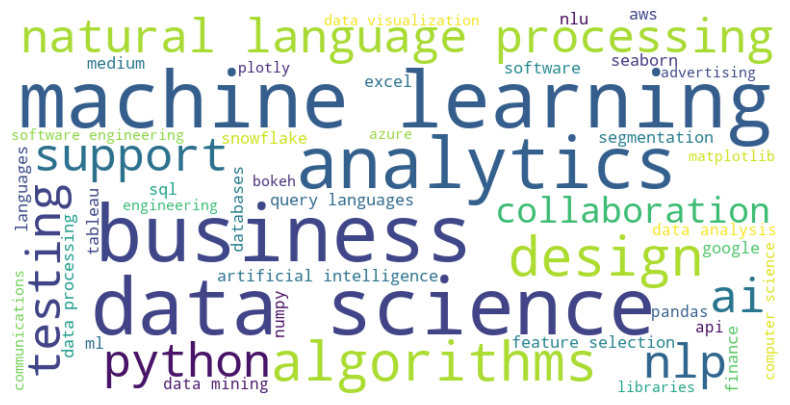

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
skills_counts
word_count = dict(zip(skills_counts.index, skills_counts['count']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# # Convert the matplotlib figure to a Plotly figure
# fig = px.imshow(wordcloud, template='plotly_white')
# fig.update_layout(title='Word Cloud Visualization')

# # Show the plot
# fig.show()